In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
phi = np.abs(np.random.normal(0.25,0.05,70000))
swc = np.abs(np.random.normal(0.1,0.01,70000))

k = 8.58102*(phi**(4.4))/(swc**2)

In [3]:
df = pd.DataFrame({'Porosity':phi , 'Swc':swc, 'Permeability(D)':k})

In [4]:
df

,Porosity,Swc,Permeability(D)
0,0.268950,0.099025,2.707678
1,0.202522,0.109794,0.632216
2,0.296626,0.097150,4.328867
3,0.238660,0.108226,1.339995
4,0.275540,0.109928,2.444207
...,...,...,...
69995,0.243496,0.089137,2.157702
69996,0.232429,0.086809,1.853879
69997,0.277440,0.115145,2.296107
69998,0.261007,0.121700,1.571168


In [ ]:
#

In [ ]:
#

In [ ]:
# df[df['Swc']<=0]

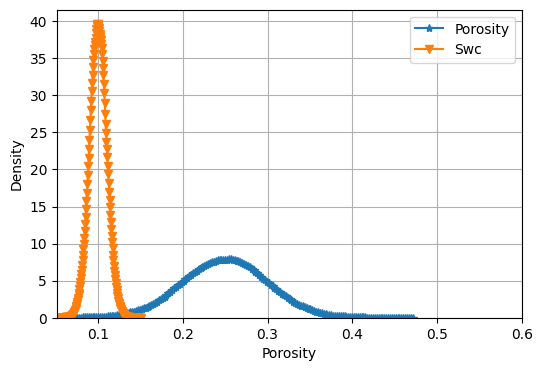

In [5]:
plt.style.use('default')

plt.figure(figsize=(6,4))

sns.kdeplot(df['Porosity'],label='Porosity',marker='*')
sns.kdeplot(df['Swc'],label='Swc',marker='v')

plt.xlim(min(swc), 0.6)

plt.grid()

plt.legend(loc='best')

In [6]:
df.head()

,Porosity,Swc,Permeability(D)
0,0.268950,0.099025,2.707678
1,0.202522,0.109794,0.632216
2,0.296626,0.097150,4.328867
3,0.238660,0.108226,1.339995
4,0.275540,0.109928,2.444207


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df.columns

X = df[['Porosity', 'Swc']]

y = df['Permeability(D)']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

###The commented-out steps are for if you apply a Deep Learning Algorithm.

In [ ]:

# from sklearn.preprocessing import MinMaxScaler

In [9]:
# scaler = MinMaxScaler()

# X_train= scaler.fit_transform(X_train)


# X_test = scaler.transform(X_test)



In [10]:
# X_train.shape

In [11]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation
# from tensorflow.keras.optimizers import Adam

In [12]:
# model = Sequential()

# model.add(Dense(2,activation='relu'))
# model.add(Dense(10,activation='relu'))
# model.add(Dense(10,activation='relu'))
# model.add(Dense(1))

# model.compile(optimizer='adam',loss='mse')

In [13]:
# model.fit(x=X_train,y=y_train.values,
#           validation_data=(X_test,y_test.values),
#           batch_size=128,epochs=100)

In [15]:
from sklearn.tree import DecisionTreeRegressor

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, e

In [16]:
model = DecisionTreeRegressor(random_state=1)

In [17]:
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [18]:
X.head()

,Porosity,Swc
0,0.268950,0.099025
1,0.202522,0.109794
2,0.296626,0.097150
3,0.238660,0.108226
4,0.275540,0.109928


In [19]:
print(model.predict(X.head()))

[2.70767766 0.62824274 4.34541393 1.33999531 2.44420734]


In [20]:
from sklearn.metrics import mean_absolute_error

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:

def get_mae(nodes, X_test,y_test,X_train,y_train):
  dt = DecisionTreeRegressor(max_leaf_nodes=nodes)
  dt.fit(X_train,y_train)
  y_p = dt.predict(X_test)
  mae = mean_absolute_error(y_test,y_p)
  return mae

In [24]:
leafs = [10,20,30,40,50,100,120,150,200,300,400,500,1000]
error = []
for x in leafs:
  er = get_mae(x, X_test,y_test,X_train,y_train)
  error.append(er)

Text(0.5, 1.0, 'Error Minimization(Elbow Method)')

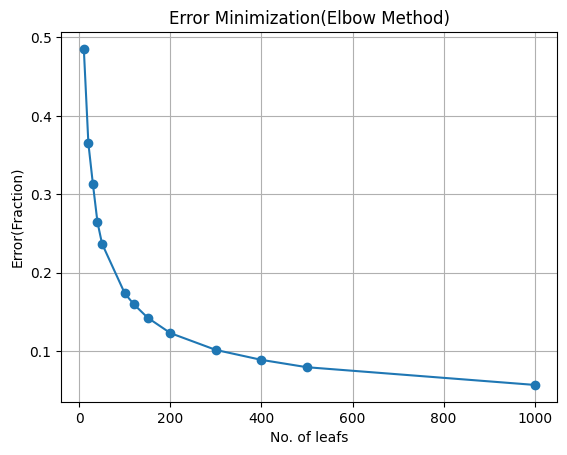

In [25]:
plt.plot(leafs,error,marker='o')
plt.grid()
plt.ylabel('Error(Fraction)')
plt.xlabel('No. of leafs')

plt.title('Error Minimization(Elbow Method)')

In [26]:
X_test.head()

,Porosity,Swc
46730,0.288314,0.102135
48393,0.296440,0.099368
41416,0.223213,0.085041
34506,0.129001,0.100838
43725,0.240804,0.107291


In [27]:
print(model.predict(X_test.head()))

[3.45621675 4.12634578 1.61677048 0.1030129  1.41816049]


In [28]:
print(y_test.head())

46730    3.456217
48393    4.126346
41416    1.616770
34506    0.103013
43725    1.418160
Name: Permeability(D), dtype: float64


In [29]:
y_p = model.predict(X_test)

Text(0, 0.5, 'Actual K values')

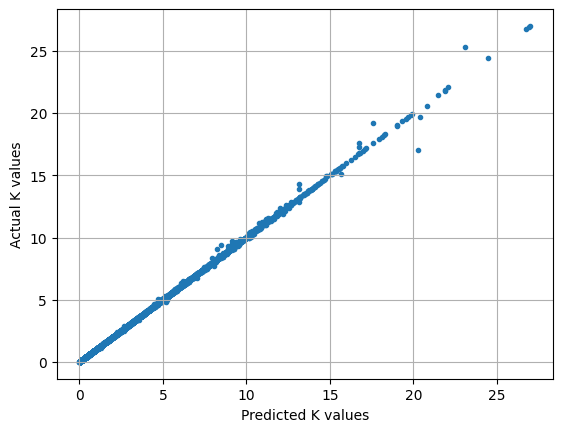

In [30]:
plt.grid()
plt.scatter(y_p,y_test,marker='.')

plt.xlabel('Predicted K values')
plt.ylabel('Actual K values')

In [31]:
from sklearn import metrics
MAE =metrics.mean_absolute_error(y_test,y_p)
MSE = metrics.mean_squared_error(y_test,y_p)
RMSE = np.sqrt(MSE)

evaluation = pd.DataFrame(data =[MAE*100,MSE*100,RMSE*100], index='MAE(%) MSE(%) RMSE(%)'.split(), columns = ['Evaluation Values'])
evaluation

,Evaluation Values
MAE(%),0.399642
MSE(%),0.143697
RMSE(%),3.790741
